In [1]:
from matplotlib import pyplot as plt
import F5Utils
from collections import Counter
import itertools

In [2]:
#TODO: Add more files
#TODO: Get filepath smarter
files = ["../somedata/multifast5/umi10000bins/batch0.fast5", "../somedata/multifast5/umi10001bins/batch0.fast5", "../somedata/multifast5/umi10002bins/batch0.fast5"]
reads = []
for f in files:
    n = next(F5Utils.getReads(f))
    reads.append(str(n[0]))

In [3]:
def get_mers(mer_size, reads):
    all_mers = itertools.product(["A", "C", "G", "T"], repeat=mer_size)
    all_mers = [''.join(item) for item in all_mers]
    possible_mers_count = len(all_mers)
    
    mers = []
    for read in reads:
        gene = read.split("\\n")[1]
        mers.extend(gene[i:i+mer_size] for i in range(0, len(gene)-mer_size))

    mer_dict = dict(Counter(mers))
    unseen = set(all_mers)-set(mer_dict.keys())
    
    sorted_mer_list = sorted(mer_dict.items(), key=lambda item: item[1], reverse=True)
    
    return all_mers, possible_mers_count, sorted_mer_list, unseen

In [4]:
def plot_mers(sorted_mer_list, mer_size, unseen, possible_mers_count):
    names = [i[0] for i in sorted_mer_list]
    values = [i[1] for i in sorted_mer_list]  
    
    plt.bar(names, values)
    plt.savefig('curve.png')
    plt.show()
    print(f"Unseen {mer_size}-mers = {len(unseen)} of {possible_mers_count} ({len(unseen)/possible_mers_count*100}%)")
    print(unseen)
    print(f"Most seen {mer_size}-mers")
    print(sorted_mer_list[:10])

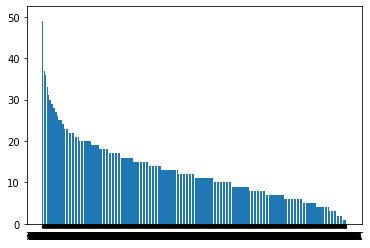

Unseen 5-mers = 12 of 1024 (1.171875%)
{'ATAGG', 'ACAAT', 'TGAAA', 'GATAG', 'ATATA', 'AAAAT', 'TAGAC', 'AATAG', 'CACAA', 'CGTGA', 'GTCGT', 'ATGAG'}
Most seen 5-mers
[('CTTTC', 50), ('TCACC', 49), ('ACCTT', 48), ('TTTCG', 43), ('CCTTC', 43), ('CACCT', 42), ('CACCG', 39), ('TTCAC', 39), ('TTTCC', 37), ('TTCGC', 37)]


In [5]:
mer_size = 5

all_mers, possible_mers_count, sorted_mer_list, unseen = get_mers(mer_size, reads)
plot_mers(sorted_mer_list, mer_size, unseen, possible_mers_count)

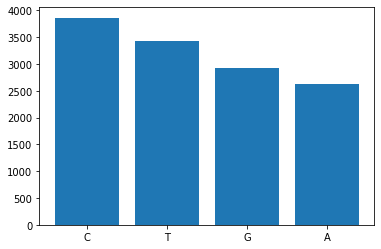

Unseen 1-mers = 0 of 4 (0.0%)
set()
Most seen 1-mers
[('C', 3865), ('T', 3438), ('G', 2921), ('A', 2636)]


In [6]:
mer_size = 1

all_mers, possible_mers_count, sorted_mer_list, unseen = get_mers(mer_size, reads)
plot_mers(sorted_mer_list, mer_size, unseen, possible_mers_count)